In [1]:
dataset_path = '/home/bot/myprojectdir/dataset/'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import LinearSVC

In [3]:
dataset = pd.read_csv(dataset_path+'processed/cleanDatasetWithEncoding.csv')

In [5]:
dataset = dataset.loc[:, dataset.columns != 'FwdHeaderLength.1'].astype('float64')

In [6]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,49188.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
1,49486.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2,88.0,609.0,7.0,4.0,484.0,414.0,233.0,0.0,69.142860,111.967896,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
3,88.0,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,72.888885,136.153810,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
4,88.0,1160.0,9.0,6.0,3134.0,3048.0,1552.0,0.0,348.222230,682.482540,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0


## Train Test Split

In [7]:
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')
labels = dataset['Label']
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,49188.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49486.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88.0,609.0,7.0,4.0,484.0,414.0,233.0,0.0,69.142860,111.967896,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88.0,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,72.888885,136.153810,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88.0,1160.0,9.0,6.0,3134.0,3048.0,1552.0,0.0,348.222230,682.482540,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.3, random_state=42)

## Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

## Random Forest Feature Selection and Importance

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
forest.fit(features_train, labels_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

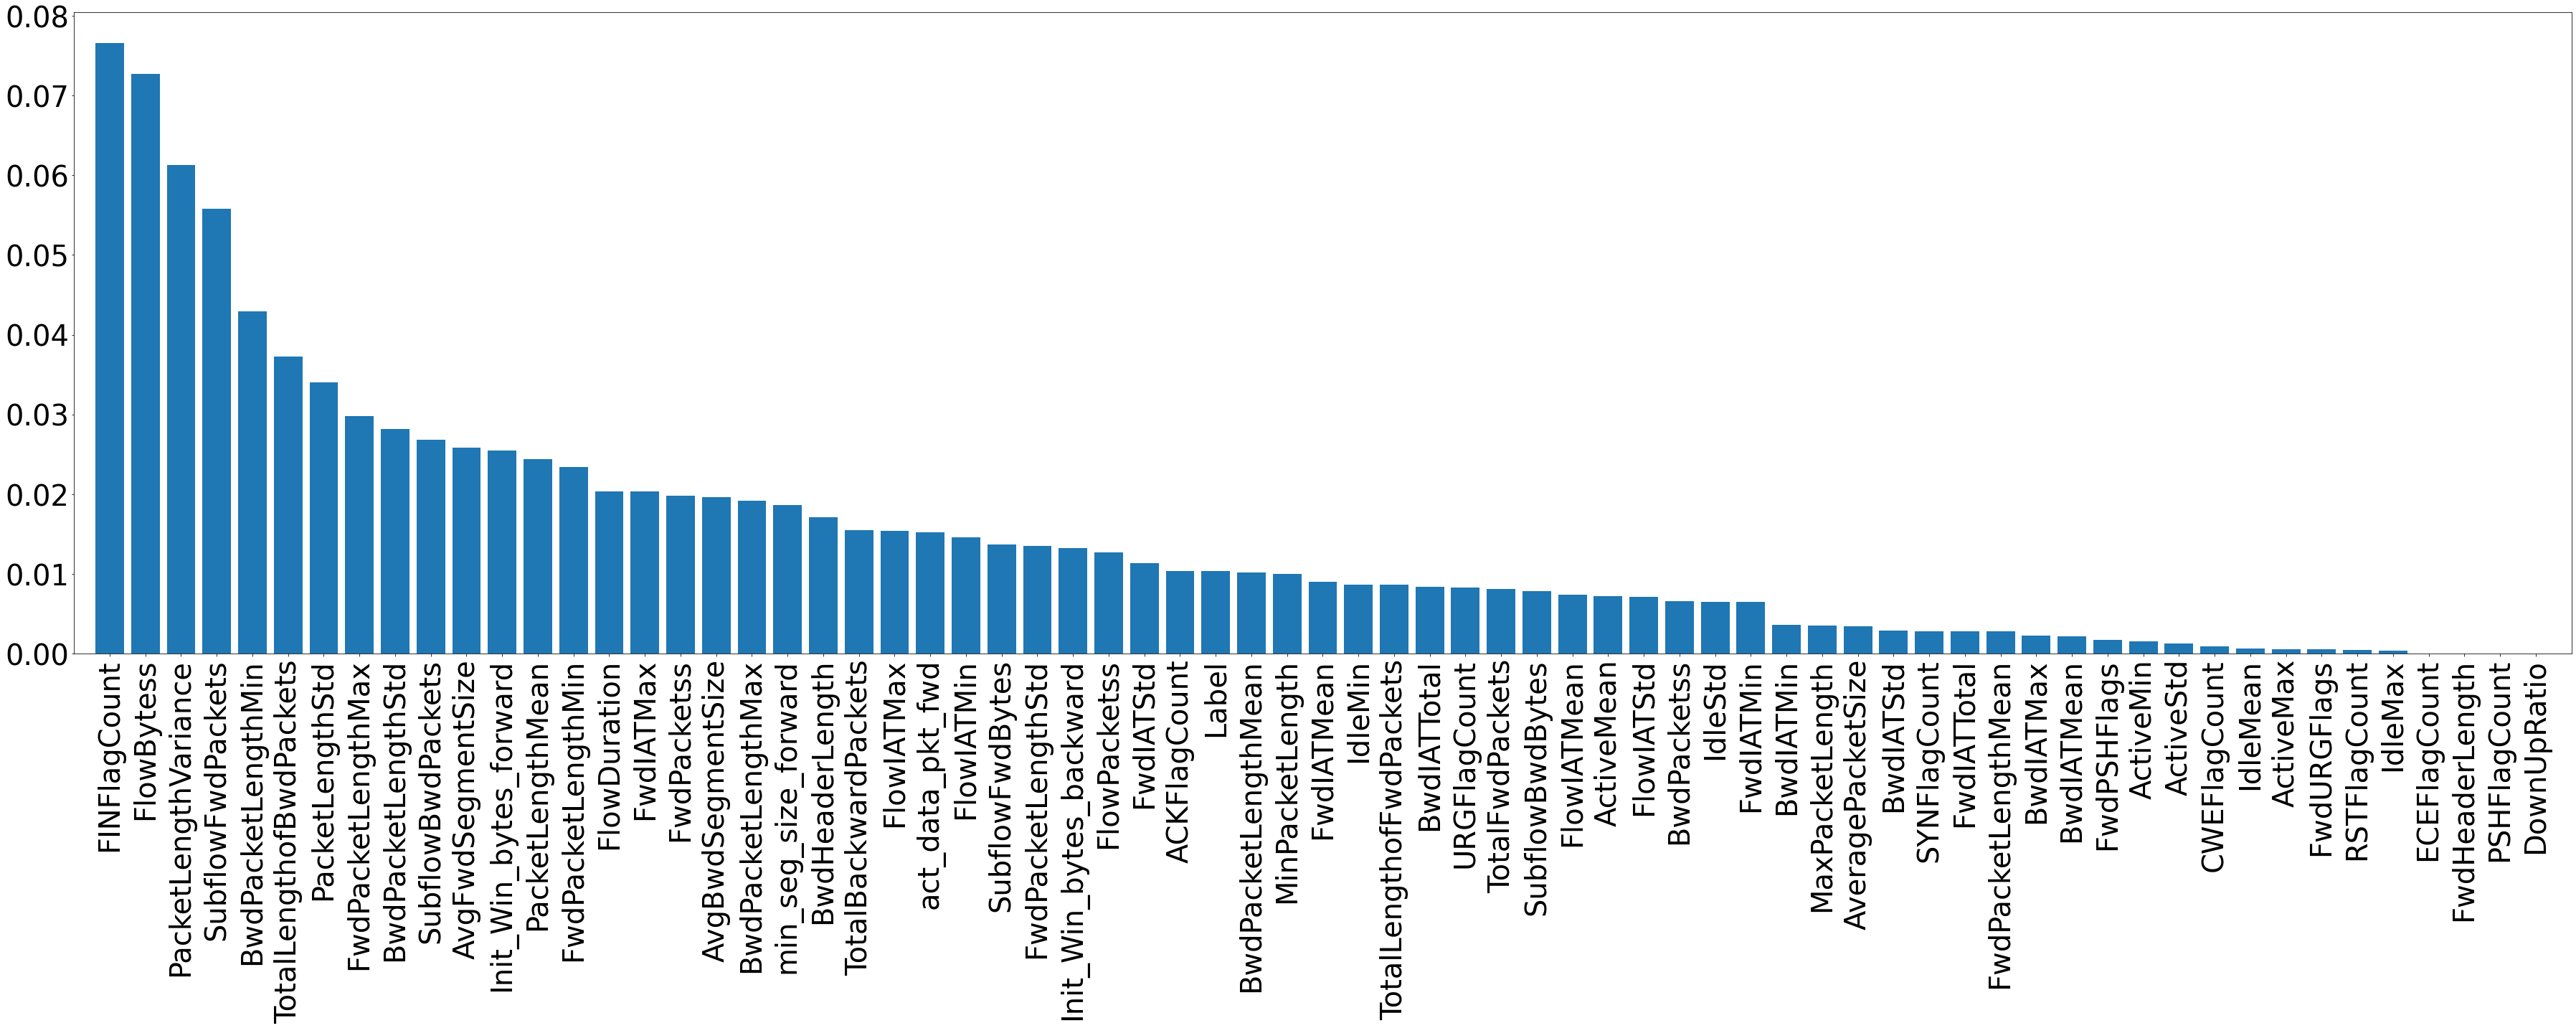

In [11]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(50,20))
plt.bar(range(features_train.shape[1]), importances[indices], align='center')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

feat_labels = dataset.columns[1:]
plt.xticks(range(features_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, features_train.shape[1]])

plt.tight_layout()
plt.show()